In [1]:
%matplotlib notebook

from combine.philip_zb_w7xt_version2 import gen_grid
from matplotlib import pyplot as plt
import ipywidgets as widgets
import numpy as np

from combine.quick_g import multi_bump, widget_g_plot, quick_g_plot
import combine.grid_analyze_version4 as ga

# plotting

In [2]:
all_old = np.load("new_violin_data.npz")
all_nonorth = all_old["nonorth"]
all_uneven = all_old["uneven"]
all_skew = all_old["skew"]
all_volume = all_old["volume"]
all_convex = all_old["convex"]

In [3]:
all_new = np.load("new_violin_data_extras.npz")
all_nonorth2 = all_new["nonorth"]
all_uneven2 = all_new["uneven"]
all_skew2 = all_new["skew"]
all_volume2 = all_new["volume"]
all_convex2 = all_new["convex"]

In [4]:
all_nonorth2.shape, all_nonorth2[0,2,0].sum()

((5, 3, 2, 253080), 173893.96027217485)

In [5]:
all_old["comment"]

array('list of grids. the first 4 axes are trace index: [0,9,18,27,36],          inner equal spacing: [False, True], normal projection: [False, True], zoidberg: [False, True]',
      dtype='<U167')

In [6]:
all_nonorth.shape, all_nonorth[0,0,0,0].sum()

((5, 2, 2, 2, 253080), 134389.9015682606)

# old plots

<IPython.core.display.Javascript object>


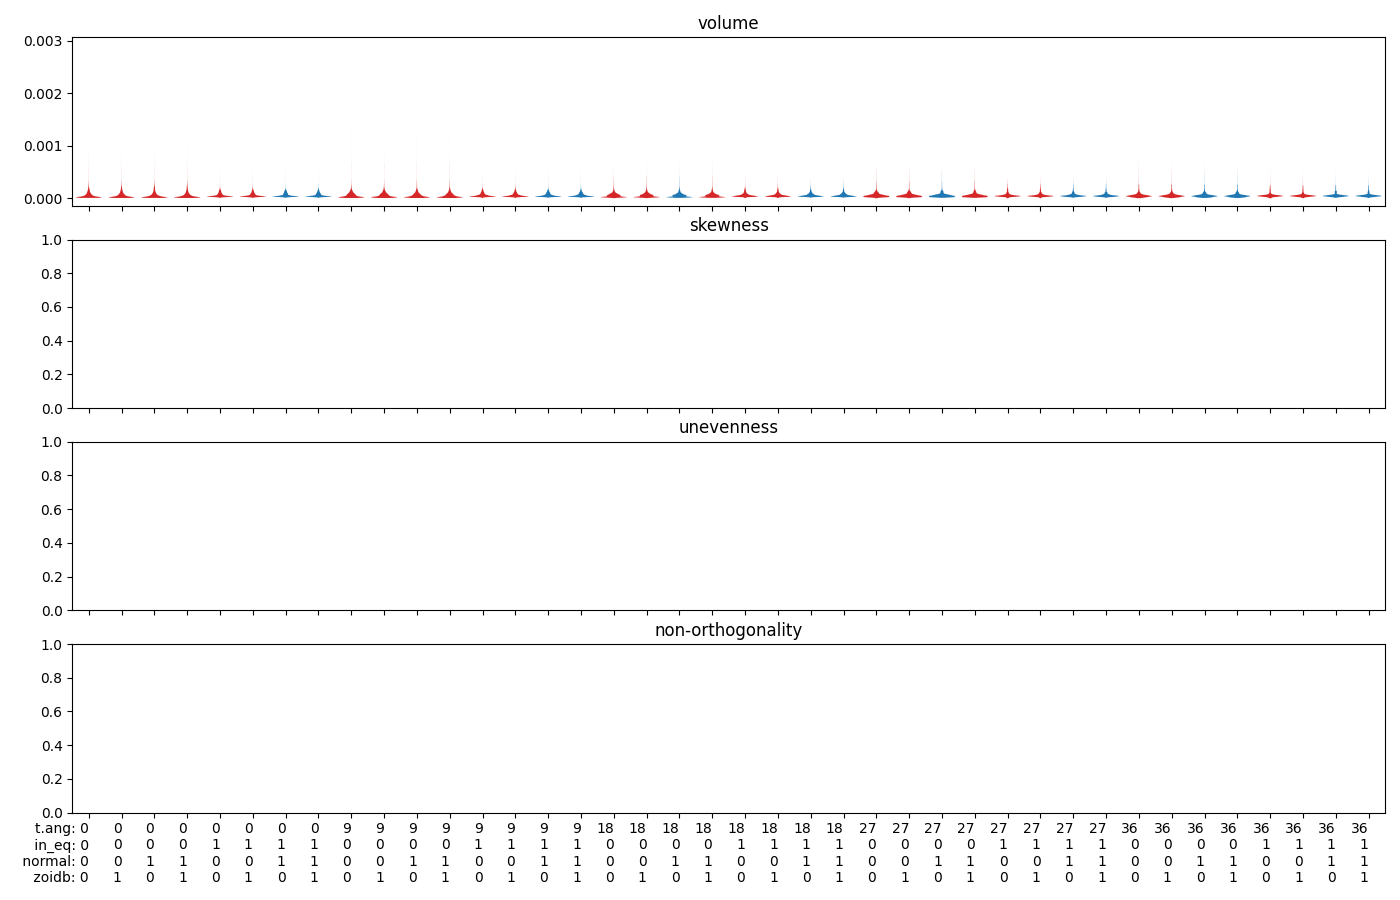

In [164]:
import itertools

plt.close("all")
fig, axs = plt.subplots(nrows = 4, sharex = True, figsize=(14,9))
axs[0].set_title("volume")
axs[1].set_title("skewness")
axs[2].set_title("unevenness")
axs[3].set_title("non-orthogonality")
axs[0].set_xticks([], [])

# Setup of x axis data
dk = list(itertools.product([0,9,18,27,36], [0,1], [0,1], [0,1]))
labels = [f"{i[0]}\n" +
          f"{i[1]}\n" +
          f"{i[2]}\n" + 
          f"{i[3]}" for i in dk]


labels[0] = f"""t.ang: {dk[0][3]}\n in_eq: {dk[0][0]}\n normal: {dk[0][1]}\n zoidb: {dk[0][2]}"""

label_vals = list(range(len(dk)))
axs[0].set_xticks(label_vals)
axs[3].set_xticklabels(labels, ha="right")
axs[0].set_xlim(-0.5,len(labels)-0.5)
#axs[0].axis["bottom"].major_ticklabels.set_va("top")

# Setup of y axis data
qtys = [all_volume] # , all_skew, all_uneven, all_nonorth]  # all_convex

# plot everything
laufindex = []
for ii in range(5):
    for jj in range(2):
        for kk in range(2):
            for ll in range(2):
                laufindex.append((ii,jj,kk,ll)) 

cl = ["C0" if all_convex[ind_tuple] else "C3" for ind_tuple in laufindex]

for j, qty in enumerate(qtys):
    yes = [qty[ind_tuple] for ind_tuple in laufindex]
    parts = axs[j].violinplot(yes, label_vals, widths=0.8, showextrema=False, points=500)
    for k, pc in enumerate(parts['bodies']):
        pc.set_facecolor(cl[k]);
        pc.set_alpha(1)
        

    
fig.tight_layout()
fig.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=None, hspace=0.2)
#fig.savefig(f"/u/phg/temp/violins.png", dpi=200)
#fig.savefig(f"/u/phg/temp/violins.pdf") 

In [31]:
axs[0].set_ylim(bottom=0, top=0.0002)
axs[1].set_ylim(bottom=0, top=0.03)
axs[2].set_ylim(bottom=0, top=0.05)
axs[3].set_ylim(bottom=0, top=1.6)
axs[0].set_yscale('linear')
axs[1].set_yscale('linear')
axs[2].set_yscale('linear')
axs[3].set_yscale('linear')

# fig.savefig(f"/u/phg/temp/violins_lin.png", dpi=200)
# fig.savefig(f"/u/phg/temp/violins_lin.pdf") 

In [32]:
axs[0].set_ylim(bottom=0, top=0.001)
axs[1].set_ylim(bottom=0, top=0.2)
axs[2].set_ylim(bottom=0, top=1)
axs[3].set_ylim(bottom=0, top=1.6)


axs[0].set_yscale('symlog', linthresh=1e-4)
axs[1].set_yscale('symlog', linthresh=0.01)
axs[2].set_yscale('symlog', linthresh=0.01)
axs[3].set_yscale('linear')

# fig.savefig(f"/u/phg/temp/violins_symlog.png", dpi=200)
# fig.savefig(f"/u/phg/temp/violins_symlog.pdf") 

# new plots

In [165]:
len(pointers)
num=1

<IPython.core.display.Javascript object>


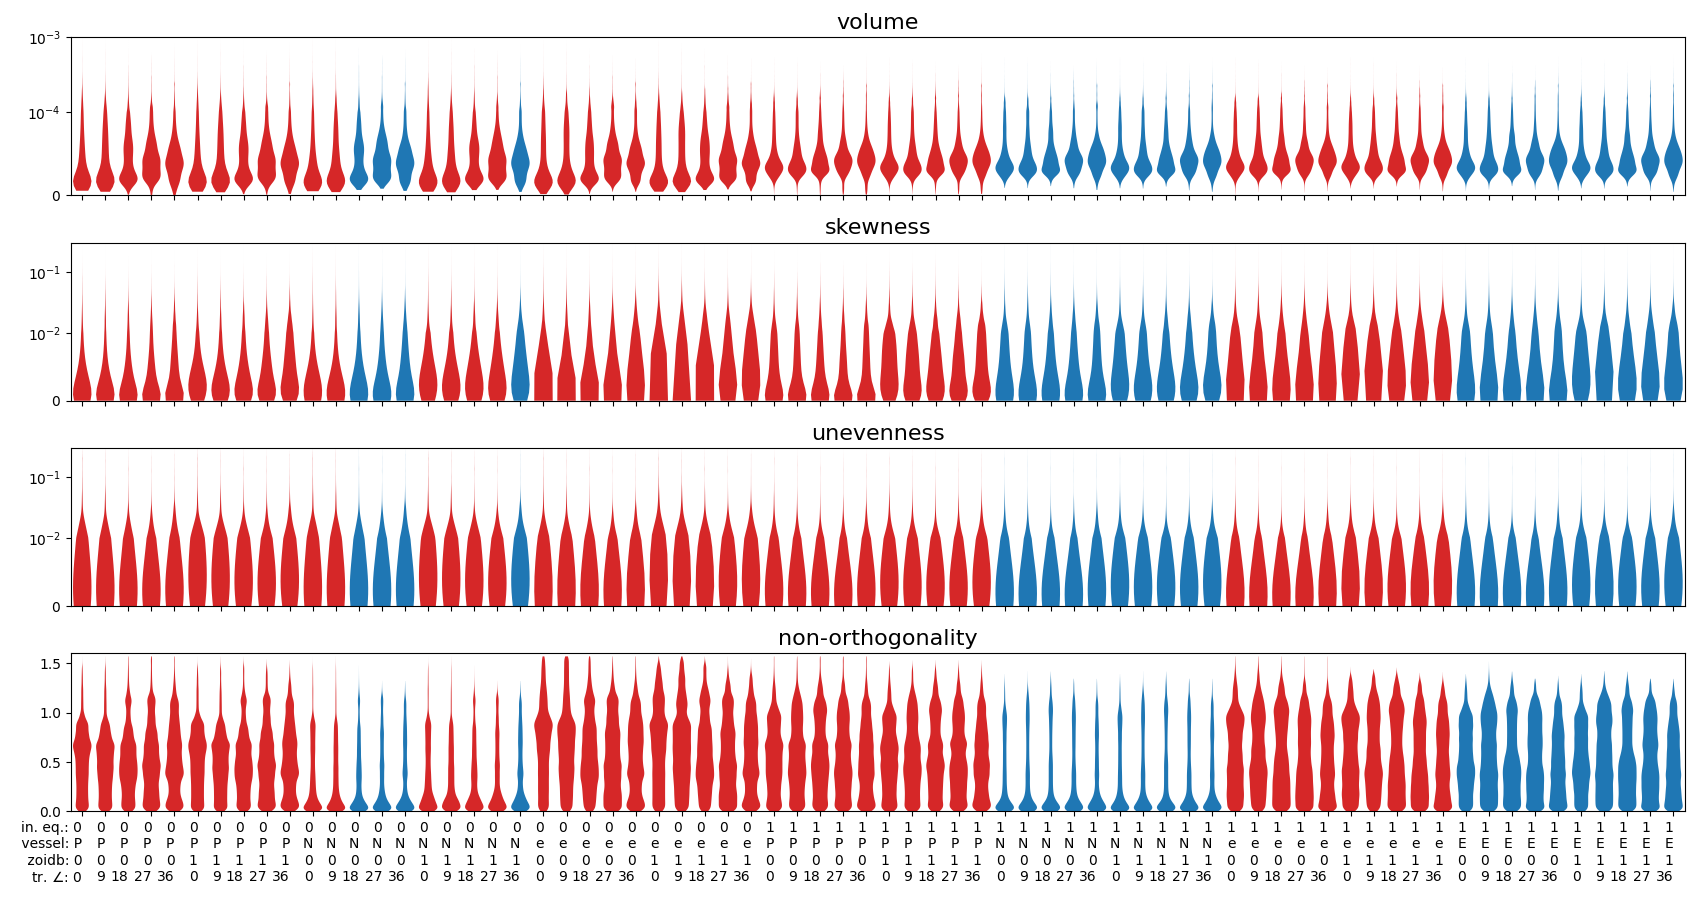

['new', 0, 2, 0]
['new', 1, 2, 0]
['new', 2, 2, 0]
['new', 3, 2, 0]
['new', 4, 2, 0]
['new', 0, 2, 1]
['new', 1, 2, 1]
['new', 2, 2, 1]
['new', 3, 2, 1]
['new', 4, 2, 1]
['new', 0, 1, 0]
['new', 1, 1, 0]
['new', 2, 1, 0]
['new', 3, 1, 0]
['new', 4, 1, 0]
['new', 0, 1, 1]
['new', 1, 1, 1]
['new', 2, 1, 1]
['new', 3, 1, 1]
['new', 4, 1, 1]
['new', 0, 0, 0]
['new', 1, 0, 0]
['new', 2, 0, 0]
['new', 3, 0, 0]
['new', 4, 0, 0]
['new', 0, 0, 1]
['new', 1, 0, 1]
['new', 2, 0, 1]
['new', 3, 0, 1]
['new', 4, 0, 1]


In [166]:
import itertools

plt.close("all")
fig, axs = plt.subplots(nrows = 4, sharex = True, figsize=(17,9))
axs[0].set_title("volume")
axs[1].set_title("skewness")
axs[2].set_title("unevenness")
axs[3].set_title("non-orthogonality")
axs[0].set_xticks([], [])

# Setup of x axis data
# P = projection, N = normals projection, e = equal spacing without bump, E = equal sp. with bump
dk = list(itertools.product([[0,"P"], [0,"N"], [0,"e"], [1,"P"], [1,"N"], [1,"e"], [1,"E"]], [0,1], [0,9,18,27,36]))
dk = [[*dkk[0], *dkk[1:]] for dkk in dk]
labels = [f"{i[0]}\n" +
          f"{i[1]}\n" +
          f"{i[2]}\n" + 
          f"{i[3]}" for i in dk]


labels[0] = f"""in. eq.: {dk[0][0]}\n vessel: {dk[0][1]}\n zoidb: {dk[0][2]}\n tr. $\\angle$: {dk[0][3]}"""

label_vals = list(range(len(dk)))
axs[0].set_xticks(label_vals)
axs[3].set_xticklabels(labels, ha="right")
axs[0].set_xlim(-0.5,len(labels)-0.5)
#axs[0].axis["bottom"].major_ticklabels.set_va("top")

# Setup of y axis data
qtys = [all_volume, all_skew, all_uneven, all_nonorth]  # all_convex
qtys2 = [all_volume2, all_skew2, all_uneven2, all_nonorth2]  # all_convex

# plot everything
pointers = []
for ineq in [0,1]:
    for vessel in ["P", "N", "e", "E"]:
        if ineq==0 and vessel=="E": continue
        for zoid in [0,1]:
            for trang, _ in enumerate([0,9,18,27,36]):
                # differentiate between new and old
                if vessel in ["e", "E"]: # new
                    if ineq==0 and vessel=="e": eqbump=2
                    if ineq==1 and vessel=="e": eqbump=1
                    if ineq==1 and vessel=="E": eqbump=0
                    pointers.append(["new", trang, eqbump, zoid])
                else: # old (ineq, normal, zoid)
                    isnorm = int(vessel=="N")
                    pointers.append(["old", trang, ineq, isnorm, zoid])
                    

cl = []
for pointer in pointers:
    if pointer[0] == "new":
        # print(pointer)
        cl.append( "C0" if all_convex2[tuple(pointer[1:])] else "C3" )
    elif pointer[0] == "old":
        cl.append( "C0" if all_convex[tuple(pointer[1:])] else "C3" )

for j, (qty,qty2) in enumerate(zip(qtys, qtys2)):
    yes = []
    for pointer in pointers:
        if pointer[0] == "new":
            yes.append( qty2[tuple(pointer[1:])] )
        elif pointer[0] == "old":
            yes.append( qty[tuple(pointer[1:])] )
    
    parts = axs[j].violinplot(yes, label_vals, widths=0.8, showextrema=False, points=500)
    for k, pc in enumerate(parts['bodies']):
        pc.set_facecolor(cl[k]);
        pc.set_alpha(1)
        
    
fig.tight_layout()
fig.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=None, hspace=0.3)

In [172]:
num=3
axs[0].set_title("volume", fontsize=16)
axs[1].set_title("skewness", fontsize=16)
axs[2].set_title("unevenness", fontsize=16)
axs[3].set_title("non-orthogonality", fontsize=16)

Text(0.5, 1.0, 'non-orthogonality')

In [175]:
axs[0].set_ylim(bottom=0, top=0.001)
axs[1].set_ylim(bottom=0, top=0.3)
axs[2].set_ylim(bottom=0, top=0.3)
axs[3].set_ylim(bottom=0, top=1.6)


axs[0].set_yscale('symlog', linthresh=1e-4)
axs[1].set_yscale('symlog', linthresh=0.01)
axs[2].set_yscale('symlog', linthresh=0.01)
axs[3].set_yscale('linear')

fig.savefig(f"./images/new_all_violins_symlog{num}.png", dpi=200)
fig.savefig(f"./images/new_all_violins_symlog{num}.pdf") 

In [174]:
axs[0].set_ylim(bottom=0, top=0.0002)
axs[1].set_ylim(bottom=0, top=0.03)
axs[2].set_ylim(bottom=0, top=0.05)
axs[3].set_ylim(bottom=0, top=1.6)
axs[0].set_yscale('linear')
axs[1].set_yscale('linear')
axs[2].set_yscale('linear')
axs[3].set_yscale('linear')

fig.savefig(f"./images/new_all_violins_lin{num}.png", dpi=200)
fig.savefig(f"./images/new_all_violins_lin{num}.pdf") 

In [60]:
num += 1
fig.set_size_inches(17, 7)

<IPython.core.display.Javascript object>


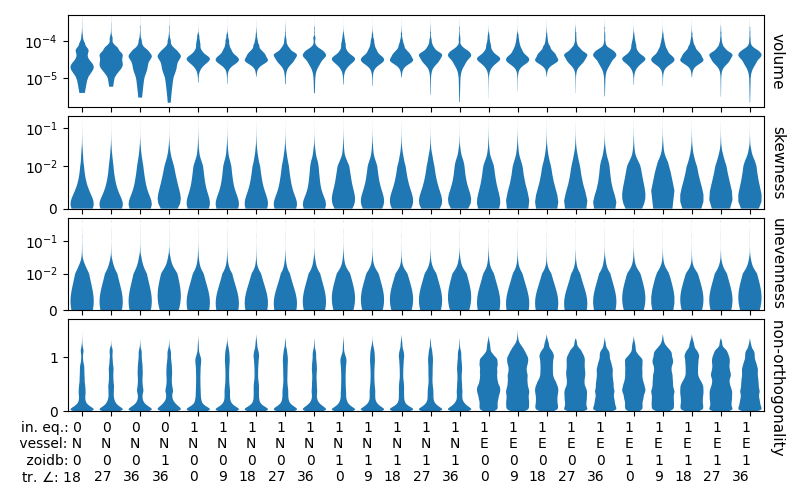

In [7]:
import itertools

num=3
plt.close("all")
fig, axs = plt.subplots(nrows = 4, sharex = True, figsize=(12,7))
axs[0].set_title("volume")
axs[1].set_title("skewness")
axs[2].set_title("unevenness")
axs[3].set_title("non orthogonality")
axs[0].set_xticks([], [])

# Setup of x axis data
# P = projection, N = normals projection, e = equal spacing without bump, E = equal sp. with bump
dk = list(itertools.product([[0,"P"], [0,"N"], [0,"e"], [1,"P"], [1,"N"], [1,"e"], [1,"E"]], [0,1], [0,9,18,27,36]))
dk = [[*dkk[0], *dkk[1:]] for dkk in dk]

label_vals = list(range(len(dk)))

# Setup of y axis data
qtys = [all_volume, all_skew, all_uneven, all_nonorth]  # all_convex
qtys2 = [all_volume2, all_skew2, all_uneven2, all_nonorth2]  # all_convex

# plot everything
pointers = []
for ineq in [0,1]:
    for vessel in ["P", "N", "e", "E"]:
        if ineq==0 and vessel=="E": continue
        for zoid in [0,1]:
            for trang, _ in enumerate([0,9,18,27,36]):
                # differentiate between new and old
                if vessel in ["e", "E"]: # new
                    if ineq==0 and vessel=="e": eqbump=2
                    if ineq==1 and vessel=="e": eqbump=1
                    if ineq==1 and vessel=="E": eqbump=0
                    pointers.append(["new", trang, eqbump, zoid])
                else: # old (ineq, normal, zoid)
                    isnorm = int(vessel=="N")
                    pointers.append(["old", trang, ineq, isnorm, zoid])
                    

cl = []
for pointer in pointers:
    if pointer[0] == "new":
        cl.append( "C0" if all_convex2[tuple(pointer[1:])] else "C3" )
    elif pointer[0] == "old":
        cl.append( "C0" if all_convex[tuple(pointer[1:])] else "C3" )
        
new_label_vals = []
new_dk = []
for i in range(len(pointers)):
    if cl[i]=="C0":
        new_label_vals.append(label_vals[i])
        new_dk.append(dk[i])
new_label_vals = range(len(new_label_vals))

labels = [f"{i[0]}\n" +
          f"{i[1]}\n" +
          f"{i[2]}\n" + 
          f"{i[3]}" for i in new_dk]
labels[0] = f"""in. eq.: {new_dk[0][0]}\n vessel: {new_dk[0][1]}\n zoidb: {new_dk[0][2]}\n tr. $\\angle$: {new_dk[0][3]}"""
        
axs[0].set_xticks(new_label_vals)
axs[3].set_xticklabels(labels, ha="right")
axs[0].set_xlim(-0.5,len(labels)-0.5)
#axs[0].axis["bottom"].major_ticklabels.set_va("top")

for j, (qty,qty2) in enumerate(zip(qtys, qtys2)):
    yes = []
    for i, pointer in enumerate(pointers):
        if pointer[0] == "new" and cl[i]=="C0":
            yes.append( qty2[tuple(pointer[1:])] )
        elif pointer[0] == "old" and cl[i]=="C0":
            yes.append( qty[tuple(pointer[1:])] )
    
    parts = axs[j].violinplot(yes, new_label_vals, widths=0.8, showextrema=False, points=500)
    for k, pc in enumerate(parts['bodies']):
        pc.set_facecolor("C0");
        pc.set_alpha(1)
        
    
fig.tight_layout()
fig.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=None, hspace=0.3)

In [19]:
axs[0].set_ylim(bottom=0.3e-5, top=0.0005)
axs[1].set_ylim(bottom=0, top=0.2)
axs[2].set_ylim(bottom=0, top=0.5)
axs[3].set_ylim(bottom=0, top=1.7)
axs[0].set_yscale('symlog', linthresh=1e-5)
axs[1].set_yscale('symlog', linthresh=0.01)
axs[2].set_yscale('symlog', linthresh=0.01)
axs[3].set_yscale('linear')

fig.savefig(f"./images/new_legal_violins_symlog{num}.png", dpi=200)
fig.savefig(f"./images/new_legal_violins_symlog{num}.pdf") 

In [18]:
axs[0].set_ylim(bottom=0, top=0.0002)
axs[1].set_ylim(bottom=0, top=0.05)
axs[2].set_ylim(bottom=0, top=0.05)
axs[3].set_ylim(bottom=0, top=1.6)
axs[0].set_yscale('linear')
axs[1].set_yscale('linear')
axs[2].set_yscale('linear')
axs[3].set_yscale('linear')
axs[0].set_yticks([])

fig.savefig(f"./images/new_legal_violins_lin{num}.png", dpi=200)
fig.savefig(f"./images/new_legal_violins_lin{num}.pdf") 

In [17]:
num = 3

for i in range(4):
    axs[i].yaxis.set_label_position("right")
    #axs[i].yaxis.tick_right()
    ylabels = ["volume", "skewness", "unevenness", "         non-orthogonality"]
    axs[i].set_ylabel(ylabels[i], rotation=270, va="bottom", ha="center", fontsize=11)
    axs[i].set_title(None)
fig.set_size_inches(8, 5)
axs[0].set_yticks([])
fig.tight_layout()
fig.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=None, hspace=0.1)